<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Probabilidade" data-toc-modified-id="Probabilidade-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Probabilidade</a></span><ul class="toc-item"><li><span><a href="#V.A.-e-Espaço-Amostral" data-toc-modified-id="V.A.-e-Espaço-Amostral-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>V.A. e Espaço Amostral</a></span></li><li><span><a href="#Função-de-Probabilidade" data-toc-modified-id="Função-de-Probabilidade-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Função de Probabilidade</a></span></li><li><span><a href="#Amostragem" data-toc-modified-id="Amostragem-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Amostragem</a></span></li><li><span><a href="#Amostra" data-toc-modified-id="Amostra-1.4"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Amostra</a></span></li><li><span><a href="#Extendendo-Variáveis-Aleatórias" data-toc-modified-id="Extendendo-Variáveis-Aleatórias-1.5"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Extendendo Variáveis Aleatórias</a></span></li><li><span><a href="#Distribuições-de-Probabilidade" data-toc-modified-id="Distribuições-de-Probabilidade-1.6"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Distribuições de Probabilidade</a></span><ul class="toc-item"><li><span><a href="#Distribuição-de-Bernoulli" data-toc-modified-id="Distribuição-de-Bernoulli-1.6.1"><span class="toc-item-num">1.6.1&nbsp;&nbsp;</span>Distribuição de Bernoulli</a></span></li><li><span><a href="#Distribuição-Binomial" data-toc-modified-id="Distribuição-Binomial-1.6.2"><span class="toc-item-num">1.6.2&nbsp;&nbsp;</span>Distribuição Binomial</a></span></li><li><span><a href="#Distribuição-Geométrica" data-toc-modified-id="Distribuição-Geométrica-1.6.3"><span class="toc-item-num">1.6.3&nbsp;&nbsp;</span>Distribuição Geométrica</a></span></li><li><span><a href="#Distribuição-de-Poisson" data-toc-modified-id="Distribuição-de-Poisson-1.6.4"><span class="toc-item-num">1.6.4&nbsp;&nbsp;</span>Distribuição de Poisson</a></span><ul class="toc-item"><li><span><a href="#Aplicação-I---Call-Center" data-toc-modified-id="Aplicação-I---Call-Center-1.6.4.1"><span class="toc-item-num">1.6.4.1&nbsp;&nbsp;</span>Aplicação I - Call Center</a></span></li></ul></li><li><span><a href="#Distribuição-Exponencial" data-toc-modified-id="Distribuição-Exponencial-1.6.5"><span class="toc-item-num">1.6.5&nbsp;&nbsp;</span>Distribuição Exponencial</a></span></li><li><span><a href="#Distribuição-Normal" data-toc-modified-id="Distribuição-Normal-1.6.6"><span class="toc-item-num">1.6.6&nbsp;&nbsp;</span>Distribuição Normal</a></span></li></ul></li></ul></li><li><span><a href="#Intervalos-de-Confiança" data-toc-modified-id="Intervalos-de-Confiança-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Intervalos de Confiança</a></span></li></ul></div>

In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

sns.set_theme(context="notebook", style="darkgrid", palette=sns.color_palette("Set2"))
bc = sns.color_palette("Set2")[0]


# Probabilidade

Como vimos na aula de estatíticas descritivas, probabilidade é o estudo de fenômenos aleatórios a partir da construção de modelos probabilísticos (no sentido contrário da estatística, que estima modelos probabílisticos a partir de observações/dados).

Mas o que são **modelos probabilísticos**? Para entender este conceito, vamos olhar primeiro para alguns conceitos fundamentais em probabilidade: **variáveis aleatórias**, **espaço amostral** e **função de probabilidade**.

## V.A. e Espaço Amostral

*Uma variável aleatória é uma variável quantitativa, cujo resultado (valor) depende de fatores aleatórios*. Por exemplo, o **resultado** do lance de uma moeda é uma variável aleatória. O espaço amostral é o conjunto de valores que nossa variável aleatória pode assumir: no exemplo da moeda, o espaço amostral é o conjunto `{cara, coroa}`.

Vamos representar o espaço amostral acima através de uma lista:

In [2]:
moeda = ["cara", "coroa"]


## Função de Probabilidade

A segunda parte de um modelo probabilístico é a **função de probabilidade**: esta função **atribui** à cada elemento do nosso **espaço amostral** uma probabilidade tal que a somatória da probabilidade de todos os eventos de nosso espaço amostra é sempre 1.

No nosso exemplo da moeda, caso esta seja justa, a função de probabilidade atribuirá 0,5 ao elemento `cara` e 0,5 ao elemento `coroa`. Vamos utilizar a função `choice()` do submódulo `random` da biblioteca `numpy` para representar nossa função de probabilidade. Esta função nos permite mapear um vetor de probabilidades, através do argumento `p = [...]`, à um espaço amostral:

In [9]:
np.random.choice(moeda, p=[0.1, 0.9])


'coroa'

## Amostragem

Toda vez que executamos a função acima estamos **amostrando** nossa variável aleatória, ou seja, estamos *criando* uma observação a partir do nosso modelo probabilístico. Vamos definir duas funções de probabilidade (dois modelos distintos descrevendo duas variáveis aleatórias diferentes): uma para uma moeda justa e outra para uma moeda injusta:

In [10]:
def jogar_moeda_justa():
    moeda = ["cara", "coroa"]
    return np.random.choice(moeda)


In [13]:
jogar_moeda_justa()


'coroa'

In [14]:
def jogar_moeda_injusta():
    return np.random.choice(moeda, p=[0.1, 0.9])


In [16]:
jogar_moeda_injusta()


'coroa'

## Amostra

Uma **amostra** é um conjunto de observações da nossa variável aleatória. Por exemplo, se lançarmos 100 moedas justas, teremos uma amostra de tamanho 100 da nossa variável. Vamos utilizar um `list comprehesion` para simular este processo:

In [17]:
amostra_100 = [jogar_moeda_injusta() for i in range(100)]


In [20]:
amostra_100[0:20]


['coroa',
 'coroa',
 'coroa',
 'coroa',
 'coroa',
 'coroa',
 'coroa',
 'coroa',
 'coroa',
 'coroa',
 'coroa',
 'coroa',
 'cara',
 'coroa',
 'coroa',
 'coroa',
 'coroa',
 'coroa',
 'coroa',
 'cara']

In [21]:
from collections import Counter


In [22]:
Counter(amostra_100)


Counter({'coroa': 86, 'cara': 14})

## Extendendo Variáveis Aleatórias

O exemplo acima trata um tipo de fenômeno aleatório extremamente simples: um lance de moeda. No entanto, podemos construir variáveis aleatórias mais complexas a partir da realização do processo de amostragem. Por exemplo, podemos definir uma variável aleatória para mensurar a probabilidade de ter **N caras** em **M lances de uma moeda justa**.

Esta nova função tem um espaço amostral composto por vetores de cara e coroa com **comprimento M** e nos permite medir a probabilidade de observarmos **2 caras em 3 lances de uma moeda justa**. O espaço amostral dessa variável aleatória:

```
['cara', 'cara', 'cara']

['cara', 'cara', 'coroa']
['cara', 'coroa', 'cara']
['coroa', 'cara', 'cara']

['cara', 'coroa', 'coroa']
['coroa', 'cara', 'coroa']
['coroa', 'coroa', 'cara']

['coroa', 'coroa', 'coroa']
```

Ou seja, nosso espaço amostral contém todos os resultados possíveis de 3 lances de uma moeda justa - e a probabilidade de observar 2 caras em 3 lances de uma moeda justa é 3/8. No exemplo acima fica claro que a construção manual do espaço amostral, mesmo quando ele é simples, é inviável! Temos duas formas de contornar este problema:

1. Diversos problemas, como o descrito acima, tem equações que nos permitem calcular, a partir da formulação do problema, a probabilidade de um certo tipo de evento;
1. Utilizando amostragem e a **lei dos grandes números**!


A **lei dos grandes números** é um teorema fundamental da probabilidade que garante que conforme aumentamos o tamanho de uma amostra a **% de eventos observada converge para a probabilidade daquele evento**!

Vamos alavancar o poder computacional e utilizar a função `jogar_moeda_justa()` para ver a **lei dos grandes números** em operação. Primeiro, vamos definir uma nova função de amostragem para nosso novo espaço amostral:

In [23]:
def jogar_3_moedas():
    evento = [jogar_moeda_justa() for i in range(3)]
    return evento


In [27]:
jogar_3_moedas()


['cara', 'cara', 'cara']

Agora, vamos criar uma função para construir amostras de tamanho fixo:

In [28]:
def amostrar_3_moedas(n_amostras):
    amostra = [jogar_3_moedas() for i in range(n_amostras)]
    return amostra


In [29]:
amostrar_3_moedas(10)


[['cara', 'coroa', 'coroa'],
 ['coroa', 'cara', 'coroa'],
 ['coroa', 'coroa', 'cara'],
 ['cara', 'coroa', 'coroa'],
 ['cara', 'coroa', 'cara'],
 ['cara', 'coroa', 'coroa'],
 ['cara', 'coroa', 'cara'],
 ['cara', 'cara', 'cara'],
 ['cara', 'cara', 'coroa'],
 ['cara', 'cara', 'cara']]

Agora vamos construir uma função para calcular a **% de observações com duas caras** para uma dada amostra:

In [32]:
a = amostrar_3_moedas(10)
a

[['cara', 'cara', 'coroa'],
 ['cara', 'cara', 'cara'],
 ['cara', 'coroa', 'cara'],
 ['cara', 'coroa', 'cara'],
 ['coroa', 'cara', 'cara'],
 ['coroa', 'cara', 'coroa'],
 ['cara', 'cara', 'cara'],
 ['coroa', 'coroa', 'cara'],
 ['cara', 'coroa', 'cara'],
 ['cara', 'cara', 'cara']]

In [37]:
contagem_caras = [evento.count("cara") for evento in a]
contagem_caras.count(2)/len(a)

0.5

In [38]:
def per_2_caras(amostra):
    contagem_caras = [evento.count("cara") for evento in amostra]
    return contagem_caras.count(2) / len(amostra)


In [39]:
per_2_caras(a)


0.5

Agora vamos criar um loop para calcular **% de observações com duas caras** para amostras de tamanho de 1 à 1000:

In [52]:
amostrar_3_moedas(51)

[['cara', 'cara', 'cara'],
 ['cara', 'cara', 'coroa'],
 ['coroa', 'coroa', 'cara'],
 ['coroa', 'coroa', 'cara'],
 ['coroa', 'coroa', 'cara'],
 ['coroa', 'coroa', 'coroa'],
 ['coroa', 'cara', 'cara'],
 ['coroa', 'coroa', 'coroa'],
 ['coroa', 'coroa', 'cara'],
 ['coroa', 'coroa', 'cara'],
 ['cara', 'coroa', 'cara'],
 ['cara', 'coroa', 'cara'],
 ['cara', 'coroa', 'coroa'],
 ['coroa', 'coroa', 'coroa'],
 ['coroa', 'cara', 'coroa'],
 ['cara', 'coroa', 'cara'],
 ['cara', 'coroa', 'coroa'],
 ['cara', 'coroa', 'coroa'],
 ['cara', 'cara', 'cara'],
 ['cara', 'coroa', 'cara'],
 ['cara', 'coroa', 'coroa'],
 ['cara', 'coroa', 'coroa'],
 ['coroa', 'cara', 'coroa'],
 ['cara', 'cara', 'cara'],
 ['coroa', 'coroa', 'coroa'],
 ['cara', 'cara', 'coroa'],
 ['cara', 'cara', 'coroa'],
 ['cara', 'coroa', 'cara'],
 ['cara', 'cara', 'cara'],
 ['cara', 'cara', 'cara'],
 ['coroa', 'coroa', 'coroa'],
 ['cara', 'coroa', 'coroa'],
 ['coroa', 'coroa', 'coroa'],
 ['cara', 'coroa', 'coroa'],
 ['coroa', 'coroa', 'cara']

In [40]:
per_observada = []
for i in range(1, 2001):
    per_observada.append(per_2_caras(amostrar_3_moedas(i)))


In [ ]:
[per_2_caras(amostrar_3_moedas(i)) for i in range(1, 2001)]

In [41]:
per_observada[0:10]

[0.0,
 1.0,
 0.6666666666666666,
 0.25,
 0.6,
 0.16666666666666666,
 0.2857142857142857,
 0.125,
 0.2222222222222222,
 0.1]

Agora vamos comparar a **% de observações com 2 caras** com a **probabilidade que calculamos** a partir do espaço amostral:

In [42]:
tb_simul_moeda = pd.DataFrame({"tx_obs": per_observada})
tb_simul_moeda["tam_amostra"] = range(1, 2001)
tb_simul_moeda["desvio"] = np.abs(3 / 8 - tb_simul_moeda["tx_obs"])
tb_simul_moeda["mm_desvio"] = tb_simul_moeda["desvio"].rolling(10).mean()


In [43]:
tb_simul_moeda.head(10)

,tx_obs,tam_amostra,desvio,mm_desvio
0,0.000000,1,0.375000,NaN
1,1.000000,2,0.625000,NaN
2,0.666667,3,0.291667,NaN
3,0.250000,4,0.125000,NaN
4,0.600000,5,0.225000,NaN
5,0.166667,6,0.208333,NaN
6,0.285714,7,0.089286,NaN
7,0.125000,8,0.250000,NaN
8,0.222222,9,0.152778,NaN
9,0.100000,10,0.275000,0.261706


Text(0.5, 0.98, 'Lei dos Grandes Números')

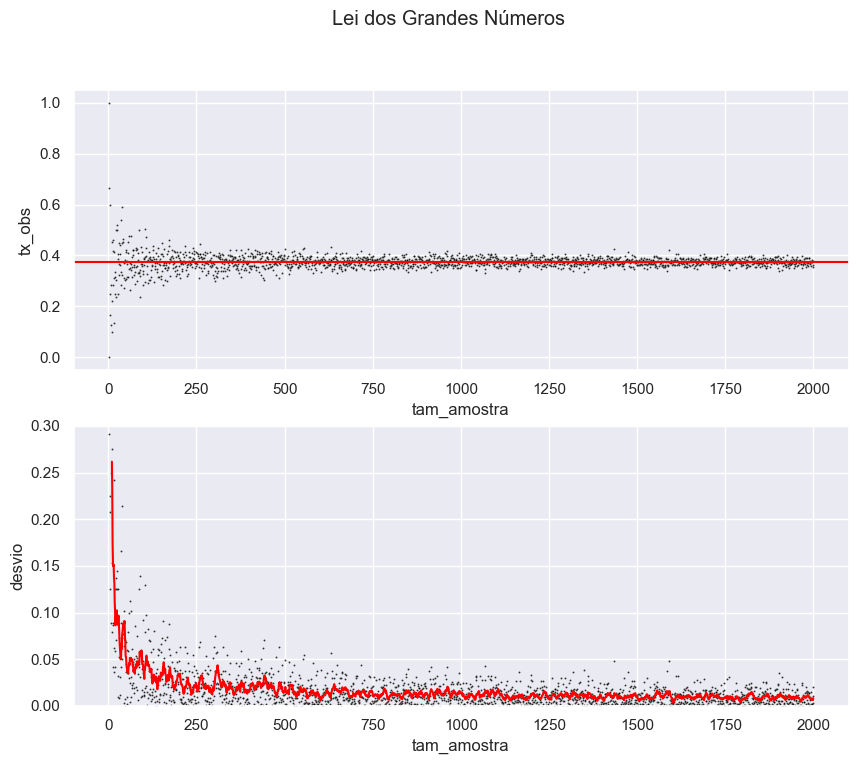

In [44]:
fig, ax = plt.subplots(2, 1, figsize=(10, 8))
sns.scatterplot(
    data=tb_simul_moeda,
    x="tam_amostra",
    y="desvio",
    alpha=0.8,
    s=2,
    color="black",
    ax=ax[1],
)
sns.lineplot(data=tb_simul_moeda, x="tam_amostra", y="mm_desvio", color="red", ax=ax[1])
sns.scatterplot(
    data=tb_simul_moeda,
    x="tam_amostra",
    y="tx_obs",
    alpha=0.8,
    s=2,
    color="black",
    ax=ax[0],
)
ax[0].axhline(3 / 8, color="red")
ax[1].set_ylim(0, 0.3)
fig.suptitle("Lei dos Grandes Números")


## Distribuições de Probabilidade

No problema acima, do lance de 3 moedas, poderíamos construir um modelo mais genérico se considerassemos outro espaço amostral: **o # de caras obtidas**. Neste caso nossa variável aleatória teria como espaço amostral os números `0, 1, 2 e 3` e nossa função de probabilidade teria que ser redefinida a partir deste espaço amostral. Neste caso teríamos construído uma **distribuição de probabilidade** bem conhecida!

Vários processos analogos ao que construímos acima já foram estudados pela probabilidade. Vamos conhecer algumas **distribuições probabílisticas** famosas, assim como o processo que ela modelam e seu espaço amostral.

### Distribuição de Bernoulli

<img src="images/bernoulli.jpg" alt="Drawing" style="width: 200px;"/>

**Espaço amostral**: *Booleano*

**Parâmetros**: 
1. *p*: probabilidade de sucesso.

A distribuição de Bernoulli é a distribuição de probabilidade mais simples que existe: ela representa o resultado de um **teste binário**, sua função de probabilidade **atribui a cada resultado, uma probabilidade**. O nosso lance de moedas é uma distribuição de Bernoulli!

Vamos utilizar a lei dos grandes números para construir amostras representativas de um variável aleatório seguindo uma distribuição de Bernoulli.

In [56]:
pd.DataFrame({"justa": dict(Counter(amostra_justa))})/ TAMANHO_AMOSTRA

,justa
cara,0.57
coroa,0.43


In [61]:
TAMANHO_AMOSTRA = 10000

amostra_justa = [jogar_moeda_justa() for i in range(TAMANHO_AMOSTRA)]
amostra_injusta = [jogar_moeda_injusta() for i in range(TAMANHO_AMOSTRA)]

tb_justa = pd.DataFrame({"justa": dict(Counter(amostra_justa))}) / TAMANHO_AMOSTRA
tb_injusta = pd.DataFrame({"injusta": dict(Counter(amostra_injusta))}) / TAMANHO_AMOSTRA


In [62]:
tb_injusta

,injusta
cara,0.0966
coroa,0.9034


Text(0.5, 1.0, 'Moeda Injusta')

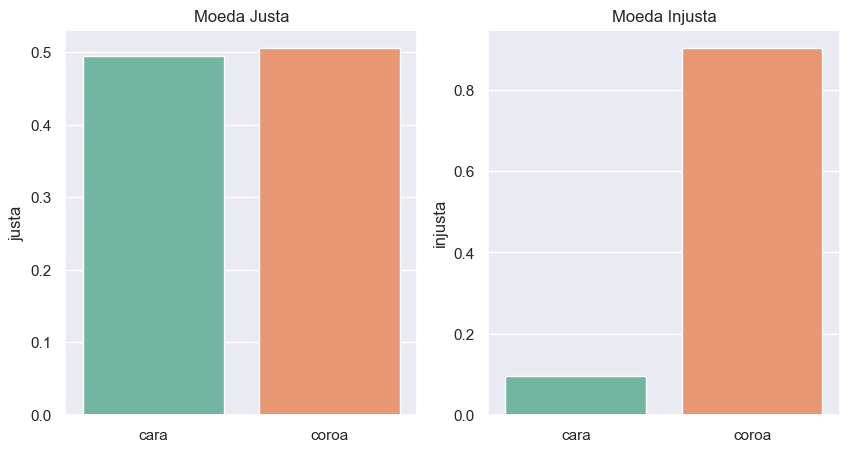

In [63]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
sns.barplot(data=tb_justa, x=tb_justa.index, y="justa", ax=ax[0])
ax[0].set_title("Moeda Justa")
sns.barplot(data=tb_injusta, x=tb_injusta.index, y="injusta", ax=ax[1])
ax[1].set_title("Moeda Injusta")


### Distribuição Binomial

**Espaço amostral**: *Números Inteiros >= 0* e *<= n*

**Parâmetros**: 
1. *n*: número de testes;
1. *p*: probabilidade de sucesso.

**Estatísticas Descritivas**:
* *Média* $$\mu = p*n$$
* *Desvio Padrão* $$\sigma = \sqrt{n * p * (1-p)}$$

A distribuição Binomial (inventada pelo mesmo Jacob Bernoulli...) representa a generalização segunda distribuição que simulamos na primeira parte da aula: dada uma série de ***n*** testes de Bernoulli, com probabilidade de sucesso igual à ***p***, qual a chance de observamos ***k*** sucessos?

Vamos construir uma função de amostragem para essa generalização:



In [64]:
def numero_coroa_justa(amostras):
    amostra = [jogar_moeda_justa() for i in range(amostras)]
    return Counter(amostra)["coroa"]


In [68]:
numero_coroa_justa(10)


4

A função acima retorna o **número de coroas**, *N*, em *M* lances de uma moeda justa. Vamos utilizar essa função para amostrar a distribuição Binomial através de uma `list comprehension`:

In [87]:
amostra_binomial = [numero_coroa_justa(10) for i in range(10000)]


In [88]:
amostra_binomial[0:6]


[7, 5, 6, 3, 5, 5]

In [89]:
contagem_amostra = Counter(amostra_binomial)
contagem_amostra


Counter({7: 1115,
         5: 2463,
         6: 2051,
         3: 1204,
         4: 2058,
         8: 425,
         2: 464,
         9: 108,
         1: 95,
         0: 6,
         10: 11})

In [90]:
contagem_amostra = Counter(amostra_binomial)
tb_binom = pd.DataFrame(
    {"num_coroas": contagem_amostra.keys(), 
     "num_eventos": contagem_amostra.values()}
)

In [91]:
tb_binom

,num_coroas,num_eventos
0,7,1115
1,5,2463
2,6,2051
3,3,1204
4,4,2058
5,8,425
6,2,464
7,9,108
8,1,95
9,0,6


In [92]:

tb_binom["prob_medida"] = tb_binom["num_eventos"] / sum(tb_binom["num_eventos"])
tb_binom = tb_binom.sort_values("num_coroas").reset_index(drop=True)
tb_binom


,num_coroas,num_eventos,prob_medida
0,0,6,0.0006
1,1,95,0.0095
2,2,464,0.0464
3,3,1204,0.1204
4,4,2058,0.2058
5,5,2463,0.2463
6,6,2051,0.2051
7,7,1115,0.1115
8,8,425,0.0425
9,9,108,0.0108


<AxesSubplot: xlabel='num_coroas', ylabel='prob_medida'>

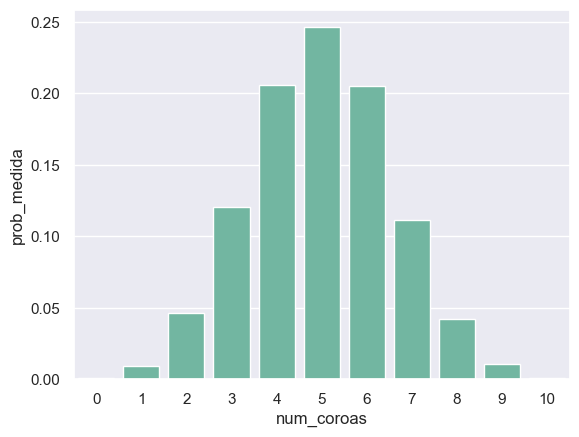

In [93]:
sns.barplot(data=tb_binom, x="num_coroas", y="prob_medida", color=bc)


Qual a média de uma distribuição **Binomial**, ou seja, em *n* lances de moeda (*p* = 0,5), quantas **coroas** observaremos em **média**?

Uma das grandes vantagem de utilizarmos distribuições de probabilidade conhecidas é que suas **funções de probabilidade** são determinadas. Por exemplo, a função de probabilidade de uma Distribuição Binomial é:

$$P(k)   = {n \choose k} p^k (1-p)^{ n-k} \$$

onde 

$${n \choose k} = \frac{n!}{n! (n! - k!)}$$

Essa equação nos permite calcular a probabilida precisa (sem efeitos de amostragem) de observar ***k*** sucessos em ***n*** testes de Bernoulli com probabilidade de sucesso igual à ***p***.

O nome desta função é **PMF** - *probability mass function*. A **PMF** nos permite, em distribuições discretas, calcular a **função de probabilidade** a partir dos parâmetros da nossa distribuição.

Vamos utilizar o submódulo `stats` da biblioteca `scipy` para acessar diretamente funções pré-programadas para diferentes distribuições.

In [94]:
import scipy as sp


A função `binom()` nos permite construir uma distribuição binomial dentro do Python. Seus dois argumentos são os parâmetros da Distribuição Binomial (*n* e *p*):

In [95]:
dist_binomial = sp.stats.binom(10, 0.5)


In [96]:
dist_binomial


A função `binom()` retorna uma objeto do tipo `rv_frozen`: uma variável aleatória (r.v. = *random variable*) com parâmetros (*n* e *p*) fixos ('congelados').

Através desse objeto podemos acessar a **PMF** de nossa variável aleatória:

In [97]:
dist_binomial.pmf(2)


0.04394531250000004

Vamos utilizar nossa **PMF** para construir um gráfico da nossa distribuição:

<AxesSubplot: >

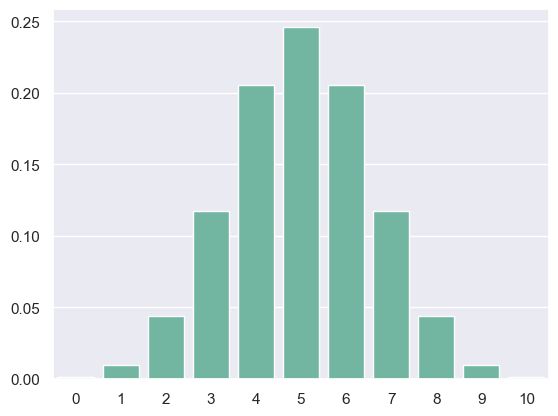

In [98]:
x = np.arange(0, 11)
y = dist_binomial.pmf(x)
sns.barplot(x=x, y=y, color=bc)


Utilizando a **PMF** podemos comparar como nossa amostra construída acima se compara com a distribuição teórica:

In [99]:
tb_binom

,num_coroas,num_eventos,prob_medida
0,0,6,0.0006
1,1,95,0.0095
2,2,464,0.0464
3,3,1204,0.1204
4,4,2058,0.2058
5,5,2463,0.2463
6,6,2051,0.2051
7,7,1115,0.1115
8,8,425,0.0425
9,9,108,0.0108


In [100]:
tb_binom["prob_real"] = tb_binom["num_coroas"].map(dist_binomial.pmf)


<AxesSubplot: xlabel='num_coroas', ylabel='prob_real'>

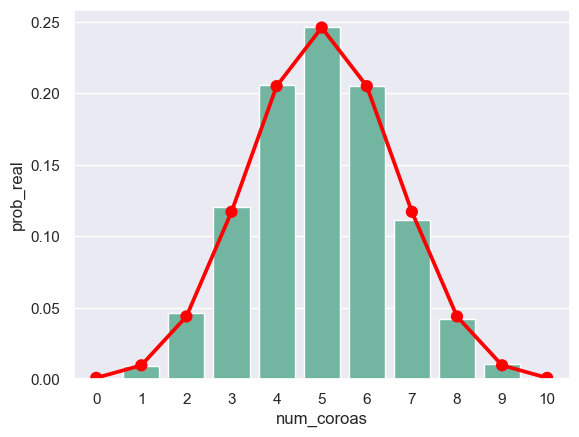

In [101]:
sns.barplot(data=tb_binom, x="num_coroas", y="prob_medida", color=bc)
sns.pointplot(data=tb_binom, x="num_coroas", y="prob_real", color="red")


Por fim, podemos utilizar a **PMF** para calcular a **probabilidade cumulativa**: qual a chance de observamos 2 ou menos coroas em 10 lances de uma moeda justa?

In [103]:
sum([dist_binomial.pmf(i) for i in [0, 1, 2]])


0.05468750000000004

Essa operação é tão comum que temos um nome para esta função: **CDF**, *cumulative distribution function*. Podemos utilizar o método `.cdf()` da nossa variável aleatória para calcular isto:

In [106]:
dist_binomial.cdf(10)


1.0

<AxesSubplot: >

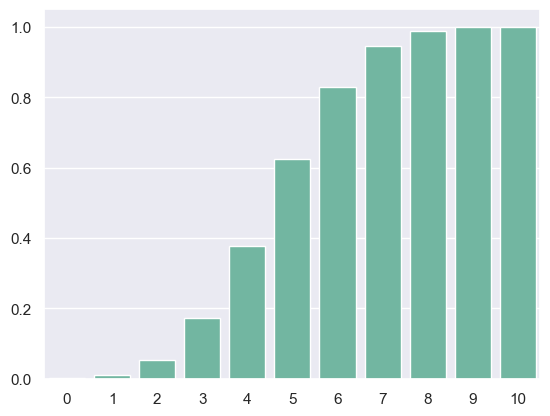

In [107]:
x = np.arange(0, 11)
y = dist_binomial.cdf(x)
sns.barplot(x=x, y=y, color=bc)


In [108]:
list(range(0, 10))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [112]:
np.arange(0, 10, 0.1)

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2,
       1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5,
       2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8,
       3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1,
       5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1, 6.2, 6.3, 6.4,
       6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7,
       7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9. ,
       9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

### Distribuição Geométrica

**Espaço amostral**: *Números Inteiros >= 1*

**Parâmetros**: 
1. *p*: probabilidade de sucesso.

**Estatísticas Descritivas**:
* *Média* $$\mu = \frac{1}{p}$$
* *Desvio Padrão* $$\sigma = \sqrt{\frac{(1-p)}{p^2}}$$

Uma segunda distribuição diretamente ligada à Distribuição de Bernoulli é a **Distribuição Geométrica**. Enquanto a **Binomial** mede a probabilidade de observamos *k* sucessos em *n* testes, a **Geométrica** me a probabilidade de obtermos o *primeiro sucesso* no *k-ésimo* teste.

No nosso exemplo da moeda justa, a distribuição **Geométrica** mede a probabilidade de observarmos a primeira *coroa* no primeiro, segundo, terceiro... teste. Vamos construir uma função de amostragem para distribuição geométrica:

In [113]:
def primeira_coroa_justa():
    i = 0
    while True:
        if jogar_moeda_justa() == "coroa":
            i += 1
            return i
        else:
            i += 1


In [117]:
primeira_coroa_justa()


1

Agora vamos utilizar uma `list comprehension` para construir uma amostra dessa distribuição:

In [118]:
amostra_geo = [primeira_coroa_justa() for i in range(100)]


In [119]:
amostra_geo[1:10]


[1, 1, 1, 3, 2, 3, 3, 2, 1]

In [120]:
contagem_amostra = Counter(amostra_geo)
tb_geo = pd.DataFrame(
    {
        "num_primeira_coroa": contagem_amostra.keys(),
        "num_eventos": contagem_amostra.values(),
    }
)
tb_geo = tb_geo.sort_values("num_primeira_coroa")
tb_geo["prob_medida"] = tb_geo["num_eventos"] / sum(tb_geo["num_eventos"])
tb_geo


,num_primeira_coroa,num_eventos,prob_medida
0,1,49,0.49
2,2,26,0.26
1,3,13,0.13
3,4,7,0.07
4,5,3,0.03
6,6,1,0.01
5,9,1,0.01


<AxesSubplot: xlabel='num_primeira_coroa', ylabel='prob_medida'>

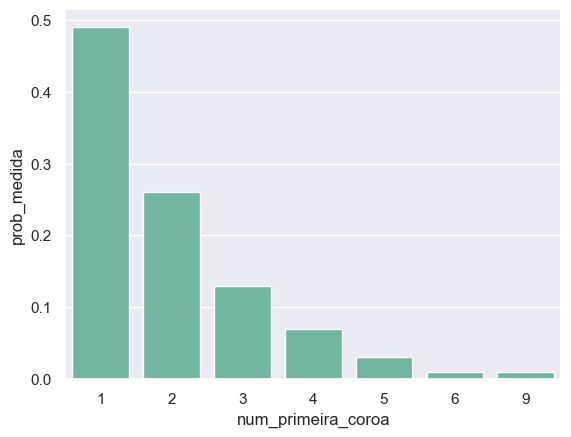

In [121]:
sns.barplot(data=tb_geo, x="num_primeira_coroa", y="prob_medida", color=bc)


A **PMF** da distribuição **Geométrica** é:

$$P(k) = (1 - p)^{k-1}p$$

e podemos acessa-la através da função `geom()` do submódulo `stats` da biblioteca `scipy`:

In [122]:
dist_geom = sp.stats.geom(0.5)


Vamos adicionar a coluna `prob_real` a nossa tabela de amostrar para comparar as taxas medidas e as taxas reais:

In [123]:
tb_geo["prob_real"] = tb_geo["num_primeira_coroa"].apply(dist_geom.pmf)


<AxesSubplot: xlabel='num_primeira_coroa', ylabel='prob_real'>

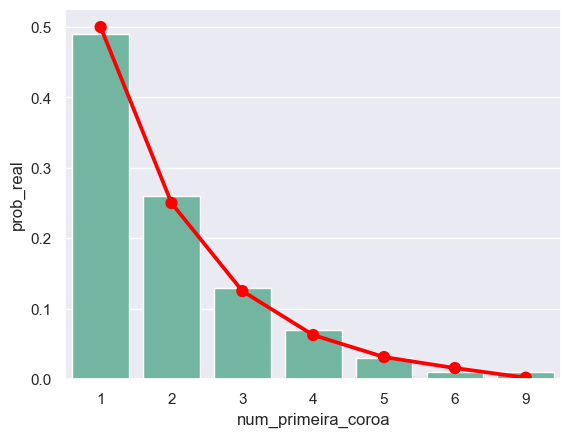

In [124]:
sns.barplot(data=tb_geo, x="num_primeira_coroa", y="prob_medida", color=bc)
sns.pointplot(data=tb_geo, x="num_primeira_coroa", y="prob_real", color="red")


### Distribuição de Poisson
**ou Finalmente uma distribuição que não foi inventada por um Bernoulli...**

<img src="images/poisson.jpg" alt="Drawing" style="width: 200px;"/>

**Espaço amostral**: *Números Inteiros >= 0*

**Parâmetros**: 
1. *lambda*: taxa de eventos.

**Estatísticas Descritivas**:
* *Média* $$\mu = \lambda$$
* *Desvio Padrão* $$\sigma = \sqrt{\lambda}$$

Simone Poisson foi um matemático francês que estudou, entre outras coisas, a probabilidade de convicções erradas na justiça francesa no séc XVIII.

A distribuição que ele inventou é um tipo particular de distribuição **Binomial**: binomiais onde o número de testes é altíssimo e a probabilidade de sucesso baixíssima. Antes da popularização da probabilidade computacional, esse tipo de distribuição era extremamente dificil de se calcular (já que a **PMF** da **Binomial** tem um **n!** em sua fórmula!).

Vamos derivar a distribuição de Poisson a partir da distribuição de Bernoulli:

In [125]:
evento_raro = ["raro", "comum"]
p = 1 / 1e05 # 1 em 100,000
n = 2e04 # 20,000
np.random.choice(evento_raro, p=[p, 1 - p])

'comum'

In [126]:
def simular_er(p):
    evento_raro = ["raro", "comum"]
    return np.random.choice(evento_raro, p=[p, 1 - p])


In [127]:
def numero_eventos_raros(amostras, p):
    amostra = [simular_er(p) for i in range(int(amostras))]
    return Counter(amostra)["raro"]


In [128]:
p = 1 / 1e05
n = 2e04
numero_eventos_raros(n, p)


0

In [133]:
numero_eventos_raros(n, p)

0

In [129]:
amostra_poi = [numero_eventos_raros(n, p) for i in range(100)]


In [135]:
amostra_poi[1:10]

[0, 1, 0, 0, 0, 0, 0, 0, 0]

In [136]:
contagem_amostra = Counter(amostra_poi)
tb_poisson = pd.DataFrame(
    {"num_raros": contagem_amostra.keys(), "num_eventos": contagem_amostra.values()}
)
tb_poisson = tb_poisson.sort_values("num_raros").reset_index()
tb_poisson


,index,num_raros,num_eventos
0,1,0,79
1,0,1,20
2,2,2,1


<AxesSubplot: xlabel='num_raros', ylabel='num_eventos'>

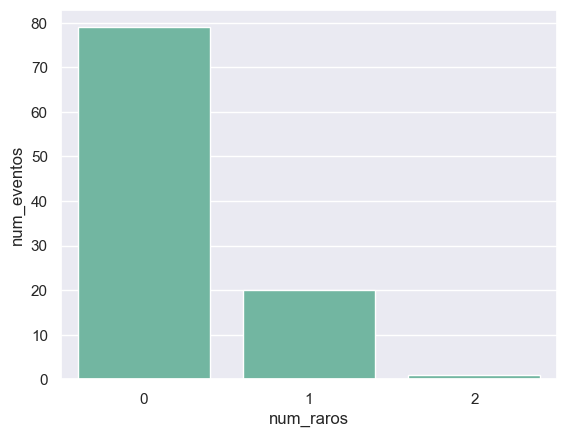

In [137]:
sns.barplot(data=tb_poisson, x="num_raros", y="num_eventos", color=bc)


A distribuição de Poisson não é parametrizada por *n* e *p* mas sim pelo **número médio de sucessos** - chamada de **lambda**:

$$\lambda = p n$$

A **PMF** da distribuição de Poisson é calculada através da equação

$$P(k) = \frac{\lambda^k e^{-\lambda}}{k!}$$

Vamos utilizar a `scipy` para construir a **PMF** da nossa distribuição de **Poisson**:

In [140]:
lamb = p * n
dist_poisson = sp.stats.poisson(p * n)


In [141]:
tb_poisson["prob_medida"] = tb_poisson["num_eventos"] / sum(tb_poisson["num_eventos"])
tb_poisson["prob_real"] = tb_poisson["num_raros"].apply(dist_poisson.pmf)


<AxesSubplot: xlabel='num_raros', ylabel='prob_real'>

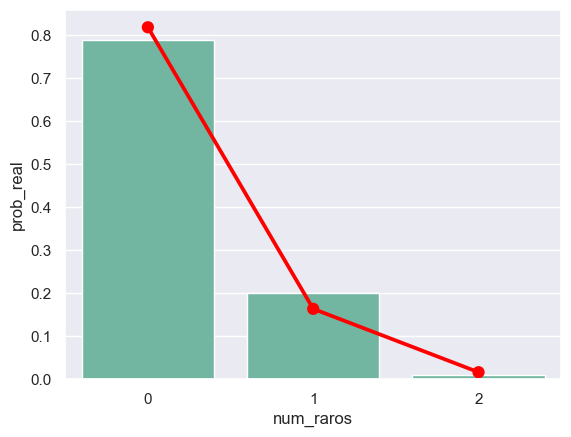

In [142]:
sns.barplot(data=tb_poisson, x="num_raros", y="prob_medida", color=bc)
sns.pointplot(data=tb_poisson, x="num_raros", y="prob_real", color="red")


Embora no exemplo acima tenhamos construído uma função de amostragem para uma distribuição de Poisson através de uma simulação isto foi feito apenas para ilustrar a conexão entre as distribuições.

Quando precisamos amostrar uma distribuição de Poisson podemos utilizar o método `.rvs()` da nossa variável aleatória (definida através do `scipy`). Este método recebe como argumento o **# de eventos que queremos amostrar da nossa distribuição**, e retorna esta amostragem como um vetor:

In [143]:
amostra_100 = dist_poisson.rvs(100)
amostra_100


array([1, 0, 0, 0, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

A distribuição de Poisson é usada habitualmente como uma **distribuição de contagem**: toda vez que noss espaço amostral é composto pelo **# de vezes que algo acontece**. Por exemplo, ela é utilizada para modelar o # de ligações que um call center recebe por hora, ou então o # de clientes que entram em um supermercado por minuto.

Em todos estes casos, o parâmetro fundamental da distribuição de Poisson é **lambda**: o número de acontecimentos por *time bucket*. 

#### Aplicação I - Call Center
Vamos utilizar a nossa **PMF** para resolver um problema prático: dado que um call center recebe **4 chamadas em média por minuto** em seu horário de pico, **até quantas ligações ele receberá em 99% dos minutos**?

Vamos começar criando os parâmetros de nossa distribuição:

In [144]:
lamb = 4


Agora, vamos inicializar nossa variável aleatória:

In [145]:
dist_ligacoes = sp.stats.poisson(lamb)


Podemos utilizar a nossa **PMF** para visualizar a probabilidade do call center receber *k* chamadas em cada minuto:

<AxesSubplot: xlabel='num_ligacoes', ylabel='prob'>

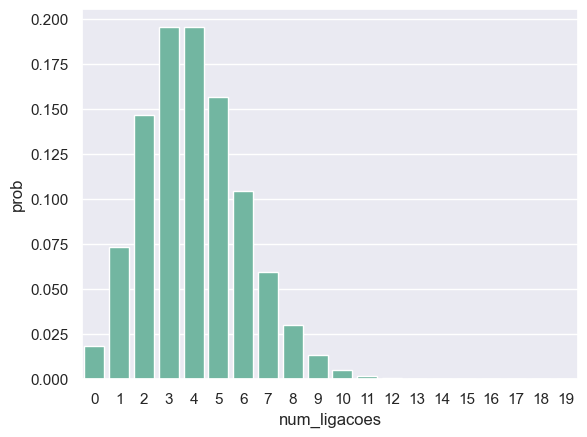

In [146]:
tb_ligacoes = pd.DataFrame({"num_ligacoes": range(20)})
tb_ligacoes["prob"] = tb_ligacoes["num_ligacoes"].map(dist_ligacoes.pmf)
sns.barplot(data=tb_ligacoes, x="num_ligacoes", y="prob", color=bc)


A PMF nos permite calcula a **probabilidade de receber *k* ligações em um minuto** mas o problema nos pede **qual o número *k* de ligações tal que 99% dos minutos recebem menos que *k* ligações**. Podemos utilizar a **CDF** para visualizar a curva acumulada:

<AxesSubplot: xlabel='num_ligacoes', ylabel='prob_acum'>

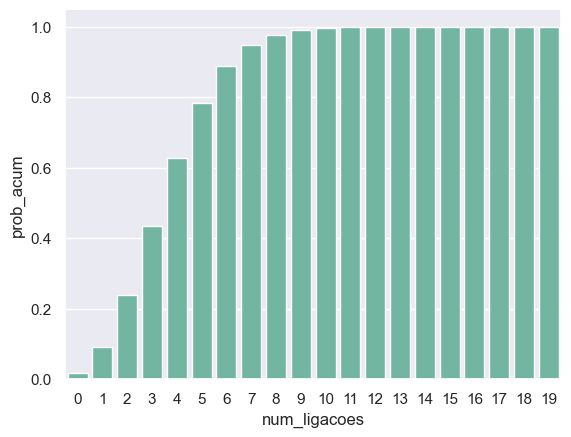

In [147]:
tb_ligacoes = pd.DataFrame({"num_ligacoes": range(20)})
tb_ligacoes["prob_acum"] = tb_ligacoes["num_ligacoes"].map(dist_ligacoes.cdf)
sns.barplot(data=tb_ligacoes, x="num_ligacoes", y="prob_acum", color=bc)


In [148]:
tb_ligacoes


,num_ligacoes,prob_acum
0,0,0.018316
1,1,0.091578
2,2,0.238103
3,3,0.433470
4,4,0.628837
5,5,0.785130
6,6,0.889326
7,7,0.948866
8,8,0.978637
9,9,0.991868


Uma outra forma mais simples é utilizar a **PPF** (*percent point function*) que nos permite calcular a partir de uma **probabilidade** o **k** tal que:

$$P(x) < k = p$$

In [149]:
dist_ligacoes.ppf(0.99)


9.0

### Distribuição Exponencial

**Espaço amostral**: *Números Reais >= 0*

**Parâmetros**: 
1. *lambda*: taxa.

**Estatísticas Descritivas**:
* *Média* $$\mu = \frac{1}{\lambda}$$
* *Desvio Padrão* $$\sigma = \frac{1}{\lambda}$$

Até agora as variáveis aleatória que vimos são todas **discretas**, ou seja, o seu espaço amostral é composto por um número pequeno de eventos possíveis (`['cara', 'coroa']` por exemplo) ou por um número inteiro.

A distribuição exponencial é **contínua**, o que significa que **não podemos calcular a probabilidade em um evento em particular**, apenas de conjuntos de eventos:

1. Se uma variável aleatória tem uma distribuição exponencial, não conseguimos calcular a probabilidade de um número *x* (**P**(*x*));
1. Para calcular a probabilidade de conjunto de eventos, calculamos a probabilide de intervalos, por exemplo: 
    * **P**(*x* < *A*) (probabilidade de um evento ter valor menor que A);
    * **P**(*x* > *A*) (probabilidade de um evento ter valor maior que A);
    * **P**(*A* < *x* < *B*) (probabilidade de um evento ter valor maior que A e menor que B);

Vamos inicializar uma variável aleatória com distribuição **Exponencial** através da função `expon()`. 

Um detalhe **importante** é que essa função não é **parametrizada por lambda** e sim por `scale = 1/lambda` (ou seja, pela média da distribuição)!

In [150]:
dist_exp = sp.stats.expon(scale=1 / lamb)


Como uma distribuição contínua não possui probabilidade associadas à cada evento, precisamos utilizar outra função para `visualizar` a distribuição: a **PDF** ou *probability density function*:

<AxesSubplot: xlabel='x', ylabel='PDF'>

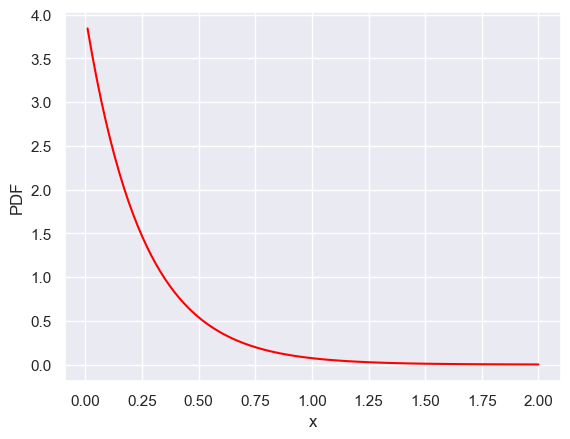

In [151]:
tb_expon = pd.DataFrame({"x": np.linspace(0.01, 2, 100)})
tb_expon["PDF"] = tb_expon["x"].map(dist_exp.pdf)
sns.lineplot(data = tb_expon, x='x', y='PDF', color="red")


Note que a **PDF** tem valores **ACIMA DE 1**! Ela não é uma função de probabilidade!

Para calcular a probabilidade de um intervalo devemos utilizar a **CDF**:

,x,PDF,CDF
0,0.010000,3.843158,0.039211
1,0.030101,3.546249,0.113438
2,0.050202,3.272278,0.181931
3,0.070303,3.019473,0.245132
4,0.090404,2.786199,0.303450
5,0.110505,2.570947,0.357263
6,0.130606,2.372324,0.406919
7,0.150707,2.189047,0.452738
8,0.170808,2.019928,0.495018
9,0.190909,1.863876,0.534031


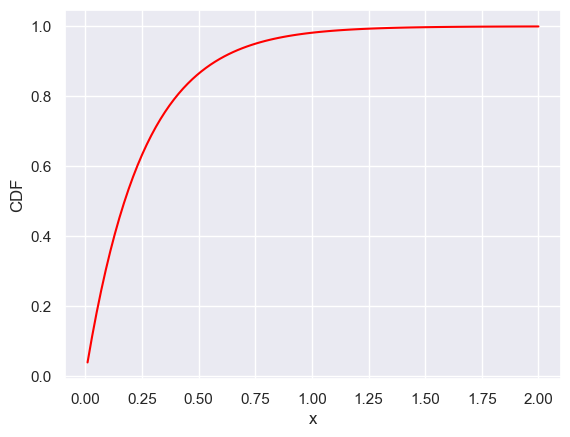

In [153]:
tb_expon["CDF"] = dist_exp.cdf(tb_expon["x"])
sns.lineplot(data = tb_expon, x='x', y='CDF', color="red")
tb_expon.head(10)


A **CDF** de uma distribuição continua nos da a probabilidade de que um evento tenha valor inferior a X (comunmente escrito **P**(*x* < *X*)). Na distribuição acima vemos que a probabilidade de um evento ter valor menor que 0,07 é de 0,245.

Para calcular a probabilidade de intervalos podemos utilizar a diferença entre **CDF**s. Vamos calcular a chance de um enveto com valores entre 0,5 e 1,5:

In [154]:
dist_exp.cdf(1.5) - dist_exp.cdf(0.5)


0.13285653105994633

A distribuição exponencial é utilizada para modelar o **tempo entre eventos independentes**, por exemplo, o tempo entre chamadas chegando em um call center. **Eventos independentes** são eventos cuja probabilidades de ocorrer não são relacionadas - por exemplo, em 2 lances de moedas sequencias, a chance de caras no segunda lance não depende do resultado do primeiro!

Utilizaremos a distribuição exponencial para simular o tempo entre ligações chegando em um call center - assumindo o mesmo lambda que utilizamos na nossa simulação de Call Center da distribuição de Poisson. **Assim como a distribuição de Poisson**, a distribuição **Exponencial** é parametrizada por **lambda**, *a taxa de chegada de eventos por unidade de tempo*.

In [157]:
1/lamb

0.25

In [155]:
amostra_exp = dist_exp.rvs(size=1000)
amostra_exp


array([3.82920296e-02, 3.17912524e-02, 2.61045584e-01, 1.44629301e-01,
       2.46996516e-01, 2.23666835e-01, 1.76250373e-02, 3.78755647e-02,
       3.91381680e-01, 1.11224003e+00, 6.86214383e-02, 8.58645824e-02,
       2.60697260e-01, 6.93453194e-02, 2.70924832e-01, 5.17465865e-01,
       9.03326832e-01, 8.35838280e-01, 7.49342659e-02, 7.54159047e-01,
       7.79148195e-02, 2.50819881e-01, 5.75910686e-02, 3.05368440e-01,
       2.26941966e-02, 7.53776081e-01, 6.52534988e-01, 7.45993989e-03,
       2.54675975e-01, 1.23332716e-01, 4.82377837e-01, 2.31616080e-02,
       5.08121737e-01, 1.17018462e+00, 1.47901159e-01, 1.39218005e-02,
       1.27402183e-01, 1.77105424e-01, 4.51472844e-02, 8.36012432e-02,
       2.90765873e-01, 2.07755445e-01, 8.07087479e-02, 9.69828455e-02,
       3.03882603e-01, 2.01820337e-02, 9.00618614e-02, 9.92304253e-04,
       9.47996386e-02, 1.30571508e-01, 1.59613021e-02, 5.15238788e-02,
       6.24709254e-02, 6.19142902e-02, 1.10385778e-01, 1.75855135e-01,
      

Agora vamos transformar essa amostra em um `DataFrame` e criar duas colunas:

1. `t_acumulado`: quanto tempo passou desde o começo da coleta de dados;
1. `minuto`: em qual minuto aconteceu cada evento.

In [158]:
tb_expon = pd.DataFrame({"t": amostra_exp})
tb_expon["t_acumulado"] = tb_expon["t"].cumsum()
tb_expon["minuto"] = np.floor(tb_expon["t_acumulado"])
tb_expon.head(10)


,t,t_acumulado,minuto
0,0.038292,0.038292,0.0
1,0.031791,0.070083,0.0
2,0.261046,0.331129,0.0
3,0.144629,0.475758,0.0
4,0.246997,0.722755,0.0
5,0.223667,0.946422,0.0
6,0.017625,0.964047,0.0
7,0.037876,1.001922,1.0
8,0.391382,1.393304,1.0
9,1.112240,2.505544,2.0


Agora vamos agrupar nossa tabela de eventos para saber quantos eventos foram observados em cada `minuto`.

In [160]:
tb_expon

,t,t_acumulado,minuto
0,0.038292,0.038292,0.0
1,0.031791,0.070083,0.0
2,0.261046,0.331129,0.0
3,0.144629,0.475758,0.0
4,0.246997,0.722755,0.0
...,...,...,...
995,0.027487,234.079305,234.0
996,0.401914,234.481219,234.0
997,0.097145,234.578364,234.0
998,0.292153,234.870517,234.0


In [159]:
n_eventos_minuto = (
    tb_expon
    .groupby("minuto")["t"]
    .count()
    .reset_index()
    .rename({"t": "num_eventos"}, axis=1)
)
n_eventos_minuto.head()


,minuto,num_eventos
0,0.0,7
1,1.0,2
2,2.0,5
3,3.0,2
4,4.0,1


In [161]:
n_eventos_minuto.head(10)

,minuto,num_eventos
0,0.0,7
1,1.0,2
2,2.0,5
3,3.0,2
4,4.0,1
5,5.0,2
6,6.0,4
7,7.0,3
8,8.0,4
9,9.0,3


Como a tabela acima contém apenas os minutos com pelo menos um evento, vamos criar uma tabela auxiliar com todos os minutos possíveis (entre 0 e o máximo da tabela de eventos):

In [162]:
lista_minutos = range(int(tb_expon["minuto"].min()), int(tb_expon["minuto"].max()))
tb_minutos = pd.DataFrame({"minuto": lista_minutos})
tb_minutos.head()


,minuto
0,0
1,1
2,2
3,3
4,4


Vamos juntar as duas tabelas para ter a contagem de eventos em cada minuto da nossa coleta de dados. 

In [163]:
tb_num_eventos = pd.merge(tb_minutos, n_eventos_minuto, how="left", on="minuto")
tb_num_eventos = tb_num_eventos.fillna(0)
tb_num_eventos


,minuto,num_eventos
0,0,7.0
1,1,2.0
2,2,5.0
3,3,2.0
4,4,1.0
...,...,...
229,229,2.0
230,230,5.0
231,231,8.0
232,232,6.0


Agora podemos visualizar a distribuição do # de ligações por minuto - e veremos que essa distribuição é uma distribuição de Poisson!

In [164]:
tb_poiss_pro = tb_num_eventos.groupby("num_eventos").count().reset_index()
tb_poiss_pro = tb_poiss_pro.rename({"minuto": "contagem"}, axis=1)
tb_poiss_pro


,num_eventos,contagem
0,0.0,3
1,1.0,23
2,2.0,28
3,3.0,41
4,4.0,39
5,5.0,35
6,6.0,30
7,7.0,11
8,8.0,16
9,9.0,5


In [165]:
tb_poiss_pro["prob_real"] = tb_poiss_pro["num_eventos"].apply(dist_ligacoes.pmf)
tb_poiss_pro["prob_medida"] = tb_poiss_pro["contagem"] / sum(tb_poiss_pro["contagem"])
tb_poiss_pro


,num_eventos,contagem,prob_real,prob_medida
0,0.0,3,0.018316,0.012821
1,1.0,23,0.073263,0.098291
2,2.0,28,0.146525,0.119658
3,3.0,41,0.195367,0.175214
4,4.0,39,0.195367,0.166667
5,5.0,35,0.156293,0.149573
6,6.0,30,0.104196,0.128205
7,7.0,11,0.059540,0.047009
8,8.0,16,0.029770,0.068376
9,9.0,5,0.013231,0.021368


<AxesSubplot: xlabel='num_eventos', ylabel='prob_real'>

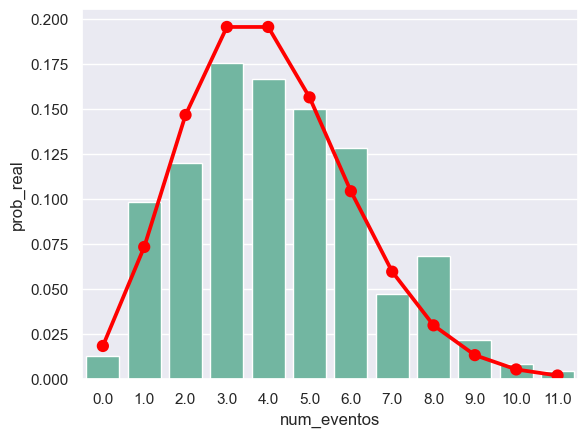

In [166]:
sns.barplot(data=tb_poiss_pro, x="num_eventos", y="prob_medida", color=bc)
sns.pointplot(data=tb_poiss_pro, x="num_eventos", y="prob_real", color="red")


O exercício acima nos permite ver como as distribuições de Poisson e Exponencial são conectadas:

1. A distribuição de Poisson mede a probabilidade de *x* eventos acontecerem por unidade de tempo;
1. A distribuição Exponencial mede a probabilidade do intervalo de tempo entre eventos.

### Distribuição Normal 
**e o Teorema do Limite Central**

<img src="images/gauss.jpeg" alt="Drawing" style="width: 200px;"/>

**Espaço amostral**: *Números Reais*

**Parâmetros**: 
1. *mu*: média.
1. *sigma*: desvio padrão.

**Estatísticas Descritivas**:
* *Média* $$\mu$$
* *Desvio Padrão* $$\sigma$$

A distribuição **Normal** foi inventada por Carl Gauss (e por isso as vezes é chamada de *Gaussiana*) em 1809 durante seu estudo de erros em medições astronômicas. Gauss descobriou que quando uma variável aleatória é o resultado de muitos processos aleatórios diferentes e independentes ela terá uma distribuição Normal.

Essa descoberta, chamada de **Teorema do Limite Central**, é uma das descobertas mais fundamentais na probabilidade. A onipresença da distribuição **Normal** é explicada por este teorema: a maior parte das coisas que mensuramos e quantificamos são resultados de inúmeros processos aleatórios complexos! Uma demonstração do teorema descoberto por Gauss está fora do escopo da aula mas podemos alavancar a probabilidade computacional para *enxergar* este teorema em ação.

Até o momento criamos diversas amostras de diferentes distribuições probabilísticas como exemplo. Vamos 'juntar' todas estas amostras em uma amostra única.

In [167]:
amostra_binomial_array = np.array(amostra_binomial[0:99])
amostra_binomial[0:5]


[7, 5, 6, 3, 5]

In [168]:
amostra_geo_array = np.array(amostra_geo[0:99])
amostra_geo[0:5]


[1, 1, 1, 1, 3]

In [169]:
amostra_poi_array = np.array(amostra_poi[0:99])
amostra_poi[0:5]


[1, 0, 1, 0, 0]

In [170]:
amostra_exp_array = np.array(amostra_exp[0:99])
amostra_exp[0:5]


array([0.03829203, 0.03179125, 0.26104558, 0.1446293 , 0.24699652])

Vamos consolidar essas amostras em uma matriz de amostras onde cada linha é uma observação, cada coluna é uma distribuição diferente:

In [171]:
matriz_amostras = np.array(
    [amostra_binomial_array, amostra_geo_array, amostra_poi_array, amostra_exp_array]
)
matriz_amostras

array([[7.00000000e+00, 5.00000000e+00, 6.00000000e+00, 3.00000000e+00,
        5.00000000e+00, 5.00000000e+00, 3.00000000e+00, 5.00000000e+00,
        6.00000000e+00, 7.00000000e+00, 4.00000000e+00, 8.00000000e+00,
        7.00000000e+00, 5.00000000e+00, 5.00000000e+00, 6.00000000e+00,
        7.00000000e+00, 5.00000000e+00, 8.00000000e+00, 8.00000000e+00,
        7.00000000e+00, 2.00000000e+00, 3.00000000e+00, 2.00000000e+00,
        4.00000000e+00, 4.00000000e+00, 4.00000000e+00, 3.00000000e+00,
        5.00000000e+00, 5.00000000e+00, 6.00000000e+00, 4.00000000e+00,
        5.00000000e+00, 5.00000000e+00, 5.00000000e+00, 5.00000000e+00,
        2.00000000e+00, 6.00000000e+00, 2.00000000e+00, 3.00000000e+00,
        6.00000000e+00, 3.00000000e+00, 6.00000000e+00, 3.00000000e+00,
        6.00000000e+00, 5.00000000e+00, 7.00000000e+00, 4.00000000e+00,
        3.00000000e+00, 7.00000000e+00, 7.00000000e+00, 6.00000000e+00,
        7.00000000e+00, 5.00000000e+00, 7.00000000e+00, 5.000000

Agora vamos calcular a média de cada observação, criando um novo vetor de observações:

In [172]:
amostra_estranha = matriz_amostras.mean(axis = 0)
amostra_estranha

array([2.25957301, 1.50794781, 2.0652614 , 1.03615733, 2.06174913,
       1.80591671, 1.50440626, 2.00946889, 2.09784542, 2.27806001,
       1.26715536, 2.27146615, 2.56517431, 2.01733633, 1.56773121,
       2.12936647, 2.22583171, 1.95895957, 3.01873357, 2.43853976,
       3.2694787 , 1.31270497, 1.26439777, 1.07634211, 1.25567355,
       1.68844402, 1.91313375, 1.00186498, 2.06366899, 1.53083318,
       1.87059446, 1.2557904 , 1.87703043, 2.04254616, 1.78697529,
       1.75348045, 1.28185055, 1.79427636, 0.76128682, 1.02090031,
       2.32269147, 1.05193886, 2.02017719, 1.27424571, 2.07597065,
       1.75504551, 2.02251547, 1.25024808, 2.02369991, 2.03264288,
       2.00399033, 1.76288097, 2.01561773, 2.26547857, 2.27759644,
       2.29396378, 1.7592809 , 1.53269479, 2.51636469, 1.77100577,
       1.32664857, 2.25801276, 1.3687939 , 2.43246206, 3.59043744,
       1.32487754, 1.79607956, 2.32483   , 2.75414032, 2.58942094,
       1.25594608, 2.33918878, 1.01128646, 2.83086975, 3.06182

Agora, vamos construir uma variável aleatório com distribuição **Normal** utilizando a função `norm()`. Os parâmetros dessa função são `loc = ` e `scale = `, a média e o desvio padrão respectivamente.

Vamos construir nossa R.V. com a média e o desvio padrão do nosso vetor com as médias das outras distribuições.

In [177]:
dist_norm = sp.stats.norm(loc=np.mean(amostra_estranha), scale=np.std(amostra_estranha))

Agora vamos construir um `DataFrame` com nossa `amostra_estranha` e criar uma **CDF** *empírica* dessa amostra:

In [178]:
tb_estranha = pd.DataFrame({'amostra' : amostra_estranha})
tb_estranha = tb_estranha.sort_values('amostra', ascending=True).reset_index(drop = True)
tb_estranha['cdf_emp'] = (tb_estranha.index + 1)/tb_estranha.shape[0]
tb_estranha

,amostra,cdf_emp
0,0.761287,0.010101
1,1.001865,0.020202
2,1.011286,0.030303
3,1.020364,0.040404
4,1.020900,0.050505
...,...,...
94,2.830870,0.959596
95,3.018734,0.969697
96,3.061821,0.979798
97,3.269479,0.989899


<AxesSubplot: xlabel='amostra', ylabel='Density'>

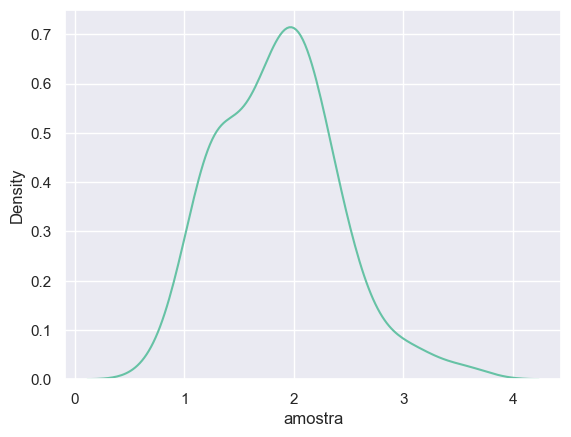

In [183]:
sns.kdeplot(data = tb_estranha, x = "amostra")

Vamos adicionar a **CDF** de nossa distribuição **Normal** à nossa tabela:

In [179]:
tb_estranha['cdf_normal'] = tb_estranha['amostra'].map(dist_norm.cdf)

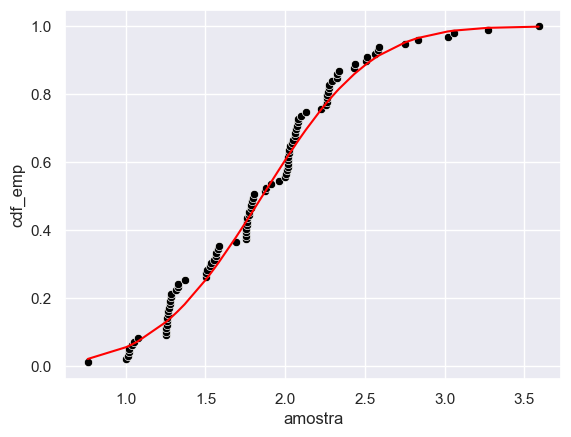

In [180]:
sns.scatterplot(data = tb_estranha, x = 'amostra', y = 'cdf_emp', color = 'black')
sns.lineplot(data = tb_estranha, x = 'amostra', y = 'cdf_normal', color = 'red');

# Intervalos de Confiança

O processo de amostragem sempre apresenta desvios em relação à distribuição real. Como vimos ao longo da aula hoje,  a lei dos grandes números garanta que conforme aumentamos uma amostra ela 'converge' para o valor real da distribuição.

A estatística utiliza-se de intervalos de confiança para medir a confiabilidade de uma amostra. Vamos aprender como utilizar esses intervalos mais a frente no curso mas podemos utilizar a probabilidade computacional para observar como eles emergem.

Vamos simular o pesquisa de intenção de voto entre dois candidatos.

In [2]:
candidatos = ["A", "B"]


def intencao_voto():
    return np.random.choice(candidatos, p=[0.51, 0.49])


In [5]:
intencao_voto()


'A'

Nossa função de amostragem `intencao_voto()` nos permite amostrar **uma pessoa**. Vamos construir uma segunda função para realizar **amostras com tamanho parametrizável**: 

In [6]:
def pesquisa_opiniao(tamanho_amostra):
    pesquisa = [intencao_voto() for i in range(tamanho_amostra)]
    c_pesq = Counter(pesquisa)
    return c_pesq["A"] / tamanho_amostra


In [17]:
pesquisa_opiniao(10)


0.7

Com essa função definida, podemos analisar **a distribuição de amostragem** da intenção de voto no candidato *A*. A **distribuição de amostragem** é a distribuição, entre pesquisas amostras de tamanho igual, **de uma estatística de interesse**, no caso, a *% de intenção de votos em A*:

In [18]:
lista_pesquisas = [pesquisa_opiniao(10) for i in range(1000)]
lista_pesquisas[0:10]

[0.4, 0.7, 0.6, 0.4, 0.7, 0.7, 0.5, 0.2, 0.7, 0.5]

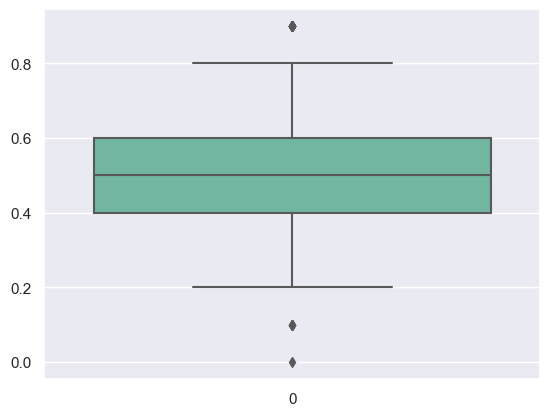

In [19]:
sns.boxplot(lista_pesquisas);


In [20]:
np.mean(lista_pesquisas)

0.5136000000000001

In [21]:
np.std(lista_pesquisas)

0.1501833546036311

Podemos agora comparar o desvio padrão dessa distribuição entre amostras de tamanhos diferentes:

In [22]:
resultado_pesquisa = []
for tamanho_amostra in range(10, 561, 50):
    lista_pesquisas = [pesquisa_opiniao(tamanho_amostra) for i in range(1000)]
    desvpad_amostragem = np.std(lista_pesquisas)
    resultado_pesquisa.append({'tam_amostra': tamanho_amostra,'sd_amostragem' : desvpad_amostragem})

tb_amostragem = pd.DataFrame(resultado_pesquisa)

In [23]:
tb_amostragem

,tam_amostra,sd_amostragem
0,10,0.156669
1,60,0.065885
2,110,0.048259
3,160,0.038559
4,210,0.033025
5,260,0.031716
6,310,0.028611
7,360,0.025783
8,410,0.024432
9,460,0.023895


<AxesSubplot: xlabel='tam_amostra', ylabel='sd_amostragem'>

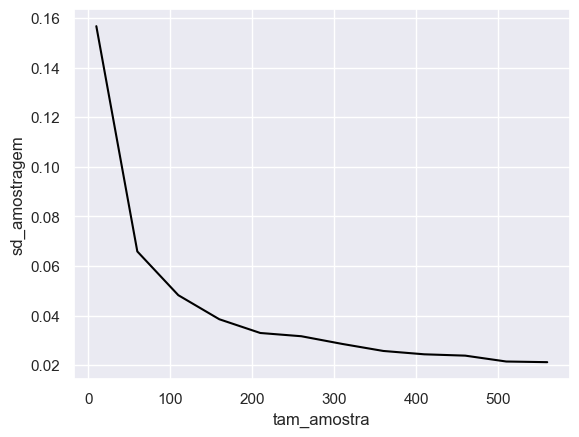

In [24]:
sns.lineplot(data = tb_amostragem, x = 'tam_amostra', y = 'sd_amostragem', color = 'black')

In [25]:
candidatos = ["A", "B"]


def intencao_voto():
    return np.random.choice(candidatos, p=[0.9, 0.1])

def pesquisa_opiniao(tamanho_amostra):
    pesquisa = [intencao_voto() for i in range(tamanho_amostra)]
    c_pesq = Counter(pesquisa)
    return c_pesq["A"] / tamanho_amostra

resultado_pesquisa = []
for tamanho_amostra in range(10, 561, 50):
    lista_pesquisas = [pesquisa_opiniao(tamanho_amostra) for i in range(100)]
    desvpad_amostragem = np.std(lista_pesquisas)
    resultado_pesquisa.append({'tam_amostra': tamanho_amostra,'sd_amostragem' : desvpad_amostragem})

tb_amostragem = pd.DataFrame(resultado_pesquisa)

<AxesSubplot: xlabel='tam_amostra', ylabel='sd_amostragem'>

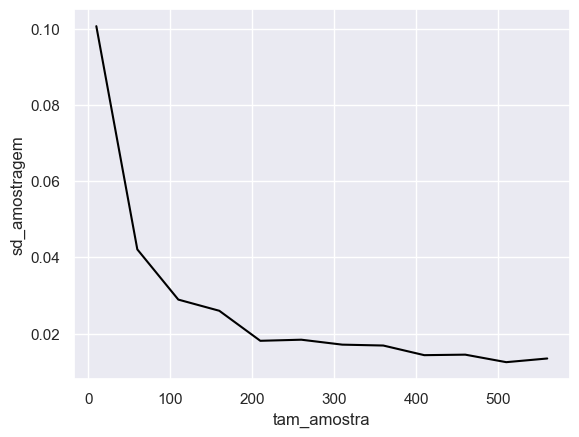

In [26]:
sns.lineplot(data = tb_amostragem, x = 'tam_amostra', y = 'sd_amostragem', color = 'black')